In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
import seaborn as sns

In [3]:
df= pd.read_csv('booking_reviews.csv')
df.head()

,review_title,reviewed_at,reviewed_by,images,crawled_at,url,hotel_name,hotel_url,avg_rating,nationality,rating,review_text,raw_review_text,tags,meta
0,Exceptional,11 July 2021,Kyrylo,NaN,"07/20/2021, 01:09:27",https://www.booking.com/reviews/be/hotel/villa...,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.7,Poland,10.0,"Everything was perfect! Quite, cozy place to r...","<p class=""review_pos ""><svg aria-label=""Positi...",Business trip~Solo traveller~Junior Suite~Stay...,"{'language': 'en-gb', 'source': 'https://www.b..."
1,I highly recommend this b&b! We enjoyed it a lot!,24 November 2019,Dimitri,NaN,"07/20/2021, 01:09:27",https://www.booking.com/reviews/be/hotel/villa...,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.7,Belgium,9.0,Very friendly host and perfect breakfast!,"<p class=""review_pos ""><svg aria-label=""Positi...",Leisure trip~Couple~Deluxe Suite~Stayed 1 nigh...,"{'language': 'en-gb', 'source': 'https://www.b..."
2,Exceptional,3 January 2020,Virginia,NaN,"07/20/2021, 01:09:27",https://www.booking.com/reviews/be/hotel/hydro...,Hydro Palace Apartment,https://www.booking.com/hotel/be/hydro-palace....,9.2,United Kingdom,10.0,It was just what we wanted for a week by the b...,"<p class=""review_neg ""><svg aria-label=""Negati...",Leisure trip~Couple~Apartment with Sea View~St...,"{'language': 'en-gb', 'source': 'https://www.b..."
3,My stay in the house was a experiencing bliss ...,8 September 2019,Kannan,NaN,"07/20/2021, 01:09:28",https://www.booking.com/reviews/be/hotel/villa...,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.7,Netherlands,10.0,My stay in the house was a experiencing bliss ...,"<p class=""review_pos ""><svg aria-label=""Positi...",Business trip~Solo traveller~Junior Suite~Stay...,"{'language': 'en-gb', 'source': 'https://www.b..."
4,One bedroom apartment with wonderful view and ...,23 June 2019,Sue,https://cf.bstatic.com/xdata/images/xphoto/squ...,"07/20/2021, 01:09:28",https://www.booking.com/reviews/be/hotel/hydro...,Hydro Palace Apartment,https://www.booking.com/hotel/be/hydro-palace....,9.2,South Africa,9.2,The building itself has a very musty smell in ...,"<p class=""review_neg ""><svg aria-label=""Negati...",Leisure trip~People with friends~Apartment wit...,"{'language': 'en-gb', 'source': 'https://www.b..."


In [4]:
display(df.info())
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26386 entries, 0 to 26385
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   review_title     26385 non-null  object 
 1   reviewed_at      26386 non-null  object 
 2   reviewed_by      26386 non-null  object 
 3   images           754 non-null    object 
 4   crawled_at       26386 non-null  object 
 5   url              26386 non-null  object 
 6   hotel_name       26386 non-null  object 
 7   hotel_url        26386 non-null  object 
 8   avg_rating       26386 non-null  float64
 9   nationality      26370 non-null  object 
 10  rating           26386 non-null  float64
 11  review_text      26386 non-null  object 
 12  raw_review_text  26386 non-null  object 
 13  tags             26386 non-null  object 
 14  meta             26386 non-null  object 
dtypes: float64(2), object(13)
memory usage: 3.0+ MB


None

review_title           1
reviewed_at            0
reviewed_by            0
images             25632
crawled_at             0
url                    0
hotel_name             0
hotel_url              0
avg_rating             0
nationality           16
rating                 0
review_text            0
raw_review_text        0
tags                   0
meta                   0
dtype: int64

In [166]:
#pre-select columns into the dataframe --> 
#even though we have included other attributes such as hotel_name, they are meant for competitor analysis
#the main priority is the review_text where topic modelling takes place 
cols = ['hotel_name','nationality','rating','review_text']
df_cols= df[cols]

#drop all the null rows
df_cols= df_cols.dropna()
df_cols.head()

,hotel_name,nationality,rating,review_text
0,Villa Pura Vida,Poland,10.0,"Everything was perfect! Quite, cozy place to r..."
1,Villa Pura Vida,Belgium,9.0,Very friendly host and perfect breakfast!
2,Hydro Palace Apartment,United Kingdom,10.0,It was just what we wanted for a week by the b...
3,Villa Pura Vida,Netherlands,10.0,My stay in the house was a experiencing bliss ...
4,Hydro Palace Apartment,South Africa,9.2,The building itself has a very musty smell in ...


# Text-Processing 

In [167]:
import re
import string
import time
import nltk
from nltk.corpus import words
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('words')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\looi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\looi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\looi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\looi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\looi\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

Sequence of text cleaning 
1. removing most used words 
2. remove punctuations and special characters 
3. lower casing 
2. stopwords -> the whole sentence becomes list 
3. lemmatization
6. tokenize 

In [168]:
#remove name_entities
name_entities_to_remove = ["hotel", "hotels", "room", "rooms"]

# Remove the named entities
for entity in name_entities_to_remove:
    # Use a space before and after the entity to ensure whole-word matching
    df_cols['review_text'] = df_cols['review_text'].replace(f" {entity} ", " ")

In [169]:
def preprocess(txt):
    #remove urls
    cleaned=re.sub(r'http\S+',' ',txt)
    #remove hashtags and word after hashtag
    cleaned=re.sub(r'#([^\s]+)',' ',cleaned)
    #remove emojis
    emoji=re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u'\U00010000-\U0010ffff'
        u"\u200d"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\u3030"
        u"\ufe0f"
                     "]+", flags = re.UNICODE)
    cleaned=emoji.sub(r'',cleaned)
    #remove punctuations and special characters
    cleaned=re.sub(r'[^\w\s]',' ',cleaned)
    cleaned="".join([c for c in cleaned if c not in string.punctuation])
    #remove numbers
    cleaned=re.sub('[0-9]+',' ',cleaned)
    #remove single character
    cleaned=re.sub(r'\s+[a-zA-Z]\s+',' ',cleaned)
    #to lower case
    cleaned=cleaned.lower()
    #remove multiple space
    cleaned=re.sub('  +',' ',cleaned)
    #tokenized
    cleaned=cleaned.split()
    return cleaned

df_cols['review_text'] = df_cols['review_text'].map(lambda s:preprocess(s))

In [170]:
#Remove non-english words
english_word_set = set(words.words())
df_cols['review_text'] = df_cols['review_text'].apply(lambda x: [item for item in x if item in english_word_set or not item.isalpha()])

In [171]:
df_cols.head()

,hotel_name,nationality,rating,review_text
0,Villa Pura Vida,Poland,10.0,"[everything, was, perfect, quite, cozy, place,..."
1,Villa Pura Vida,Belgium,9.0,"[very, friendly, host, and, perfect, breakfast]"
2,Hydro Palace Apartment,United Kingdom,10.0,"[it, was, just, what, we, for, week, by, the, ..."
3,Villa Pura Vida,Netherlands,10.0,"[my, stay, in, the, house, was, bliss, in, lux..."
4,Hydro Palace Apartment,South Africa,9.2,"[the, building, itself, very, musty, smell, in..."


In [172]:
#remove stopwords
stop_words=nltk.corpus.stopwords.words('english')
df_cols['review_text'] = df_cols['review_text'].apply(lambda x: [item for item in x if item not in stop_words])

In [173]:
df_cols.head()

,hotel_name,nationality,rating,review_text
0,Villa Pura Vida,Poland,10.0,"[everything, perfect, quite, cozy, place, relax]"
1,Villa Pura Vida,Belgium,9.0,"[friendly, host, perfect, breakfast]"
2,Hydro Palace Apartment,United Kingdom,10.0,"[week, beach, winter, location, apartment, qui..."
3,Villa Pura Vida,Netherlands,10.0,"[stay, house, bliss, luxury, house, sheer, tou..."
4,Hydro Palace Apartment,South Africa,9.2,"[building, musty, smell, hallway, despite, bui..."


In [174]:
from collections import defaultdict, Counter
# Assuming df_cols['review_text'] is a list of lists
all_words = [item for sublist in df_cols['review_text'] for item in sublist]
# Count word frequency
word_counts = Counter(all_words)
# Sort the word counts in ascending order
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
# Display the word counts
for word, count in sorted_word_counts:
    print(f"{word}: {count}")


room: 9478
available: 8256
review: 7698
location: 6925
breakfast: 6448
good: 5661
hotel: 5091
staff: 5091
nice: 4473
great: 4348
clean: 4114
friendly: 3487
comfortable: 2749
bed: 2494
stay: 2274
everything: 2166
really: 2155
helpful: 2149
excellent: 2049
place: 1997
bathroom: 1986
would: 1985
nothing: 1891
well: 1703
could: 1684
also: 1668
us: 1649
perfect: 1632
close: 1617
one: 1604
parking: 1590
shower: 1563
small: 1538
bit: 1424
like: 1411
lovely: 1341
night: 1293
city: 1222
walk: 1204
area: 1188
time: 1162
little: 1151
quiet: 1142
spacious: 1132
station: 1070
host: 1065
beautiful: 1057
coffee: 1055
check: 1045
apartment: 1042
big: 1032
even: 963
restaurant: 934
get: 905
floor: 897
service: 892
reception: 891
bar: 888
amazing: 882
easy: 878
price: 875
quite: 874
old: 867
center: 838
water: 829
food: 827
next: 799
view: 792
day: 783
super: 780
much: 778
need: 775
people: 756
central: 745
free: 742
door: 740
back: 734
kitchen: 700
walking: 696
recommend: 675
house: 674
made: 671
moder

In [176]:
#remove name_entity for redundancy and related to the domain such as hotel and room, these name entities serve no meaningful purposes for interpretation. 
common_words = ['room','hotel']
df_cols['review_text'] = df_cols['review_text'].apply(lambda x: [item for item in x if item not in common_words])

In [177]:
#text lemmatization
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)
#init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize(s):
#for lemmatizing the word
     s = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in s]
     return s

#columns containing a list of words 
df_cols['review_text'] = df_cols['review_text'].apply(lambda x: lemmatize(x))

In [178]:
df_cols.head()

,hotel_name,nationality,rating,review_text
0,Villa Pura Vida,Poland,10.0,"[everything, perfect, quite, cozy, place, relax]"
1,Villa Pura Vida,Belgium,9.0,"[friendly, host, perfect, breakfast]"
2,Hydro Palace Apartment,United Kingdom,10.0,"[week, beach, winter, location, apartment, qui..."
3,Villa Pura Vida,Netherlands,10.0,"[stay, house, bliss, luxury, house, sheer, tou..."
4,Hydro Palace Apartment,South Africa,9.2,"[building, musty, smell, hallway, despite, bui..."


In [179]:
text = df_cols['review_text'].apply(' '.join)
text = text.str.cat(sep= ' ')

text

'everything perfect quite cozy place relax friendly host perfect breakfast week beach winter location apartment quiet well spotless clean stay house bliss luxury house sheer touch beauty wrap luxury kindness care make remarkable stay building musty smell hallway despite built apartment good bearable hot water go every cold water come hot water come back checked thing like apartment view great apartment furnish modern style everything may need apartment clean free secure parking outside building parking lot downstairs garage always promptly sent via book messenger nothing beautiful home great comfortable bed hostess enough gracious welcome even give husband lift conference thank generous hospitality would stay many send owner fill everything great perfect location perfect clean everything need inside best best bath spacious enough lot bath electric car free charge available review nothing place perfect excellent place stay highly recommend stay extremely helpful one best stayed good rom

In [180]:
df_cols.to_csv('pre-processed_topic_modelling.csv')

# Exploratory analysis - word cloud


In [36]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 660.6 kB/s eta 0:00:01
   ------- ------------------------------- 61.4/300.2 kB 544.7 kB/s eta 0:00:01
   ----------------------- ---------------- 174.1/300.2 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.7 MB/s eta 0:00:00


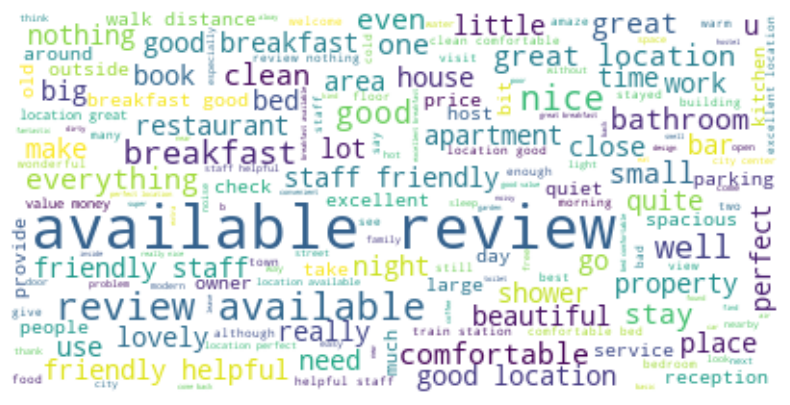

In [182]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(df_cols['review_text'].apply(lambda x: ' '.join(map(str, x))))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# LDA

In [183]:
from gensim import corpora, models

dictionary_LDA = corpora.Dictionary(df_cols['review_text'])
corpus = [dictionary_LDA.doc2bow(list_of_tokens) for list_of_tokens in df_cols['review_text']]
corpus

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)],
 [(2, 1), (6, 1), (7, 1), (8, 1)],
 [(9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1)],
 [(18, 1),
  (19, 1),
  (20, 1),
  (21, 2),
  (22, 1),
  (23, 2),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 2),
  (28, 1),
  (29, 1)],
 [(1, 1),
  (9, 4),
  (11, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 2),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 2),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 2),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 2),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 3)],
 [(27, 1),
  (47, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 1)],
 [(1, 2),
 

In [184]:
def compute_coherence_values_lda(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary,random_state=42)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [185]:
import gensim
from gensim.models.coherencemodel import CoherenceModel

model_list, coherence_values = compute_coherence_values_lda(dictionary=dictionary_LDA, corpus=corpus, texts=df_cols['review_text'], start=2, limit=11, step=1)


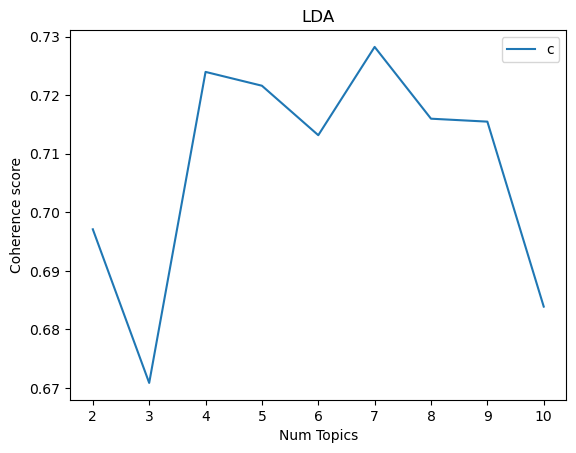

In [186]:
# Show graph
limit=11; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.title('LDA')
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores

In [187]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.6971
Num Topics = 3  has Coherence Value of 0.6709
Num Topics = 4  has Coherence Value of 0.724
Num Topics = 5  has Coherence Value of 0.7216
Num Topics = 6  has Coherence Value of 0.7132
Num Topics = 7  has Coherence Value of 0.7282
Num Topics = 8  has Coherence Value of 0.716
Num Topics = 9  has Coherence Value of 0.7155
Num Topics = 10  has Coherence Value of 0.6839


In [199]:
len(model_list)

9

In [188]:
# Select the model and print the topics
optimal_model = model_list[8]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=20)

[(0,
  '0.015*"area" + 0.015*"walk" + 0.014*"location" + 0.013*"small" + 0.013*"street" + 0.012*"bathroom" + 0.012*"good" + 0.012*"station" + 0.012*"close" + 0.011*"nice" + 0.009*"bed" + 0.009*"get" + 0.009*"parking" + 0.008*"quite" + 0.008*"clean" + 0.008*"main" + 0.007*"even" + 0.007*"easy" + 0.007*"well" + 0.007*"comfortable"'),
 (1,
  '0.022*"door" + 0.022*"night" + 0.016*"one" + 0.016*"bad" + 0.014*"smell" + 0.013*"could" + 0.013*"open" + 0.012*"noise" + 0.012*"check" + 0.011*"even" + 0.011*"reception" + 0.010*"air" + 0.010*"also" + 0.010*"sleep" + 0.009*"noisy" + 0.009*"morning" + 0.009*"next" + 0.008*"come" + 0.008*"say" + 0.008*"good"'),
 (2,
  '0.049*"perfect" + 0.041*"location" + 0.038*"everything" + 0.032*"great" + 0.028*"nothing" + 0.027*"breakfast" + 0.021*"host" + 0.020*"friendly" + 0.018*"excellent" + 0.018*"clean" + 0.018*"place" + 0.017*"nice" + 0.016*"amaze" + 0.015*"super" + 0.015*"wonderful" + 0.014*"staff" + 0.013*"stay" + 0.010*"comfortable" + 0.010*"beautiful" + 

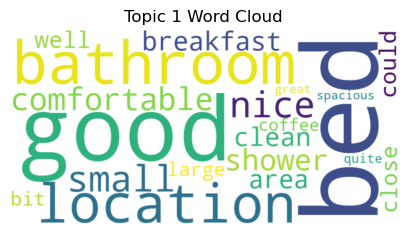

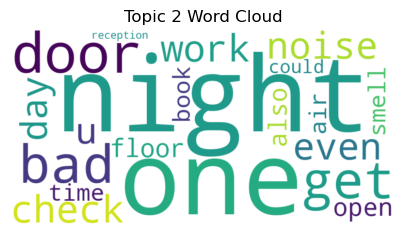

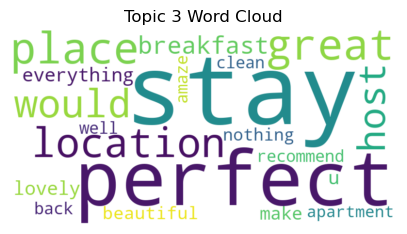

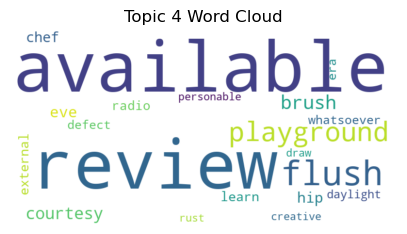

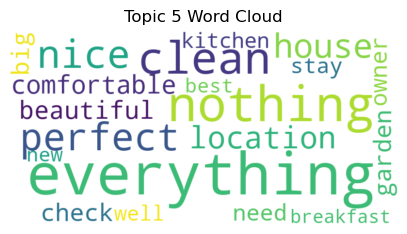

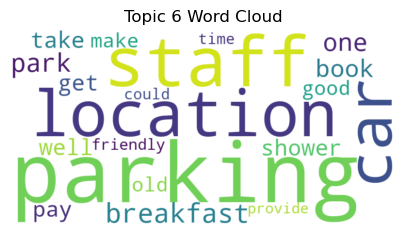

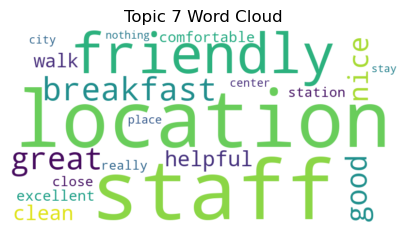

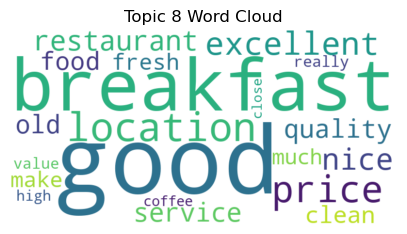

In [204]:
# Assuming model_list contains LDA models with different numbers of topics
optimal_model_index = 6

# Select the optimal LDA model
optimal_model = model_list[optimal_model_index]

# Get the topics and their words
topics = optimal_model.show_topics(num_words=20, formatted=False)

# Generate and plot word clouds for each topic
for topic_number, words in topics:
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(words))
    
    plt.figure(figsize=(5, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Topic {topic_number + 1} Word Cloud")
    plt.show()

# Final Run and Visualization

In [193]:
!pip install pyLDAvis

     ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
      --------------------------------------- 0.1/2.6 MB 648.1 kB/s eta 0:00:04
     -- ------------------------------------- 0.1/2.6 MB 1.1 MB/s eta 0:00:03
     --- ------------------------------------ 0.2/2.6 MB 1.4 MB/s eta 0:00:02
     ---- ----------------------------------- 0.3/2.6 MB 1.4 MB/s eta 0:00:02
     ----- ---------------------------------- 0.4/2.6 MB 1.4 MB/s eta 0:00:02
     ------- -------------------------------- 0.5/2.6 MB 1.6 MB/s eta 0:00:02
     --------- ------------------------------ 0.6/2.6 MB 1.8 MB/s eta 0:00:02
     ----------- ---------------------------- 0.7/2.6 MB 1.9 MB/s eta 0:00:01
     ------------- -------------------------- 0.9/2.6 MB 2.1 MB/s eta 0:00:01
     ----------------- ---------------------- 1.1/2.6 MB 2.3 MB/s eta 0:00:01
     ------------------- -------------------- 1.3/2.6 MB 2.4 MB/s eta 0:00:0

In [194]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [203]:
# Create an LDA model with the optimal number of topics (7)
model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=2000,
    alpha='auto',
    eta='auto',
    iterations=100,
    num_topics=7,  # Set the number of topics to the determined optimal value
    passes=8,
    eval_every=None
)

In [206]:
pyLDAvis.enable_notebook()
lda_viz = gensimvis.prepare(model, corpus, dictionary_LDA, sort_topics=True)
pyLDAvis.display(lda_viz)

Explaination on coherence value 
1. https://www.baeldung.com/cs/topic-modeling-coherence-score#:~:text=We%20can%20use%20the%20coherence,words%20are%20to%20each%20other.
2. https://www.linkedin.com/advice/1/how-do-you-evaluate-coherence-perplexity
3. https://datascienceplus.com/evaluation-of-topic-modeling-topic-coherence/
4. https://www.dataknowsall.com/topicmodels.html
5. https://namyalg.medium.com/how-many-topics-4b1095510d0e